# Multi class Random Forest modelling to predict sources

### Import libraries and load data

In [134]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.metrics import roc_auc_score
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)
print('x' in np.arange(5))   #returns False, without Warning

False


In [135]:
##Importing data and creating dataframe 
df = pd.read_csv('firstout.csv')
df.head()

,Unnamed: 0,id,plant,size,number,auction,capacity,physical_guarantee,sold_lots,source,...,gkf,fdi,primary_energy_consumption,g,exch,inv_US$_billion,state,inv_size,physical_guarantee_size,distance_from_last_auction
0,0,1,UHE Foz do Rio Claro,0.091,11,Leilão 2/2005,68.4,41.0,41.0,hydro,...,17.204883,1.733901,8.86,84956.3,2.3399,0.120104543,GO,10918594.82,3.727273,0.798005
1,1,2,UHE São José,0.091,11,Leilão 2/2005,51.0,30.4,30.0,hydro,...,17.204883,1.733901,8.86,84956.3,2.3399,0.08931406,RS,8119460.00,2.763636,0.798005
2,2,3,UHE Passo São João,0.091,11,Leilão 2/2005,77.0,39.0,37.0,hydro,...,17.204883,1.733901,8.86,84956.3,2.3399,0.114362101,RS,10396554.64,3.545455,0.798005
3,3,4,UHE Simplício,0.091,11,Leilão 2/2005,337.7,191.3,185.0,hydro,...,17.204883,1.733901,8.86,84956.3,2.3399,0.616054447,RJ,56004949.73,17.390909,0.798005
4,4,5,UHE Retiro Baixo,0.091,11,Leilão 2/2005,82.0,38.5,36.0,hydro,...,17.204883,1.733901,8.86,84956.3,2.3399,0.112149186,MG,10195380.55,3.500000,0.798005


In [136]:
#Retrieving keys
df.keys()

Index(['Unnamed: 0', 'id', 'plant', 'size', 'number', 'auction', 'capacity',
       'physical_guarantee', 'sold_lots', 'source', 'company_consortium',
       'year', 'price_US$', 'inv_US$', 'gdp_growth', 'risk_embi', 'gkf', 'fdi',
       'primary_energy_consumption', 'g', 'exch', 'inv_US$_billion', 'state',
       'inv_size', 'physical_guarantee_size', 'distance_from_last_auction'],
      dtype='object')

In [137]:
df = df.drop(columns=['Unnamed: 0', 'id', 'plant', 'number', 'auction', 'capacity',
       'sold_lots', 'company_consortium', 'inv_US$_billion', 'g', 'size',
       'year', 'price_US$', 'gdp_growth', 'risk_embi', 'gkf', 'fdi',
       'primary_energy_consumption', 'exch',  
       'inv_size', 'physical_guarantee_size', ])
df.head()

,physical_guarantee,source,inv_US$,state,distance_from_last_auction
0,41.0,hydro,120104543.0,GO,0.798005
1,30.4,hydro,89314060.0,RS,0.798005
2,39.0,hydro,114362101.0,RS,0.798005
3,191.3,hydro,616054447.0,RJ,0.798005
4,38.5,hydro,112149186.0,MG,0.798005


### Factorizing the non-numeric variables

In [138]:
#Factorize source
factor = pd.factorize(df['source'])
df.source = factor[0]
definitions = factor[1]
print(df.source.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: source, dtype: int64
Index(['hydro', 'coal', 'sugar cane bagasse', 'diesel oil', 'others',
       'fuel oil', 'biomass', 'natural gas', 'wind', 'solar', 'biogas'],
      dtype='object')


In [139]:
#Factorize state
factor2 = pd.factorize(df['state'])
df.state = factor2[0]
definitions2 = factor2[1]
print(df.state.head())
print(definitions2)

0    0
1    1
2    1
3    2
4    3
Name: state, dtype: int64
Index(['GO', 'RS', 'RJ', 'MG', 'SP', 'MT', 'PR', 'RN', 'BA', 'PE', 'SC', 'CE',
       'MA', 'MS', 'RO', 'PB', 'TO', 'ES', 'PI', 'AP', 'AL', 'SE', 'PA', 'AM',
       'RR', 'AC'],
      dtype='object')


In [140]:
#Control that it has worked in the data frame 
df = df.dropna()
df.head()

,physical_guarantee,source,inv_US$,state,distance_from_last_auction
0,41.0,0,120104543.0,0,0.798005
1,30.4,0,89314060.0,1,0.798005
2,39.0,0,114362101.0,1,0.798005
3,191.3,0,616054447.0,2,0.798005
4,38.5,0,112149186.0,3,0.798005


### Defining the model

In [141]:
df=df[['state', 'physical_guarantee', 'inv_US$', 'distance_from_last_auction', 'source']]

In [142]:
#Splitting the data into independent and dependent variables
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values
print('The independent features set: ')
print(X[:4,:])
print('The dependent variable: ')
print(y[:4])

The independent features set: 
[[0.00000000e+00 4.10000000e+01 1.20104543e+08 7.98004988e-01]
 [1.00000000e+00 3.04000000e+01 8.93140600e+07 7.98004988e-01]
 [1.00000000e+00 3.90000000e+01 1.14362101e+08 7.98004988e-01]
 [2.00000000e+00 1.91300000e+02 6.16054447e+08 7.98004988e-01]]
The dependent variable: 
[0 0 0 0]


### Split the data into training and testing sets and feature scaling

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)


In [144]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Running the model

In [145]:
from sklearn.calibration import CalibratedClassifierCV
classifier = RandomForestClassifier(criterion = 'entropy', random_state=42, class_weight='balanced') ## with class balanced for imbalanced classification
classifier.fit(X_train, y_train)
cal_clf = CalibratedClassifierCV(classifier, method="sigmoid", cv="prefit")
cal_clf.fit(X_test, y_test)
y_score = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.predict_proba(X)

array([[0.66, 0.03, 0.  , ..., 0.01, 0.  , 0.  ],
       [0.71, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.71, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.63, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.64, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.6 , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

### Obtaining predictions
***
#### With a much less judicious use of the algorithm's tuning possibities, the results are even more mixed

In [146]:
y_pred

array([8, 9, 2, 8, 8, 8, 8, 8, 9, 8, 9, 8, 9, 8, 8, 9, 7, 8, 8, 8, 8, 9,
       5, 9, 8, 8, 9, 8, 2, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 2, 0, 8, 8,
       9, 8, 8, 8, 9, 8, 8, 2, 8, 7, 8, 8, 8, 8, 8, 8, 8, 0, 8, 2, 8, 8,
       8, 8, 8, 7, 0, 8, 8, 8, 8, 9, 8, 8, 8, 5, 9, 8, 0, 0, 2, 9, 8, 2,
       8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 5, 8, 8, 0, 2, 8, 8, 8,
       8, 8, 8, 8, 8, 9, 8, 8, 0, 8, 8, 0, 9, 5, 8, 9, 5, 8, 8],
      dtype=int64)

### Some steps towards analysing the result

In [147]:
#Creating a dataframe with the predicition array
df2 = pd.DataFrame(y_pred, columns = ['source'])
df2

,source
0,8
1,9
2,2
3,8
4,8
...,...
124,8
125,9
126,5
127,8


In [148]:
# Reverse factorize the original dataframe's states to make comparisons
reversefactor = dict(zip(range(10),definitions))
df2.source = np.vectorize(reversefactor.get)(df2.source)
df2.source

0                    wind
1                   solar
2      sugar cane bagasse
3                    wind
4                    wind
              ...        
124                  wind
125                 solar
126              fuel oil
127                  wind
128                  wind
Name: source, Length: 129, dtype: object

In [149]:
#Count predicted values
df2['source'].value_counts()

wind                  85
solar                 17
hydro                  9
sugar cane bagasse     8
fuel oil               5
natural gas            4
biomass                1
Name: source, dtype: int64

In [150]:
#Normalize counted values
df2.source.value_counts(normalize=True)

wind                  0.658915
solar                 0.131783
hydro                 0.069767
sugar cane bagasse    0.062016
fuel oil              0.038760
natural gas           0.031008
biomass               0.007752
Name: source, dtype: float64

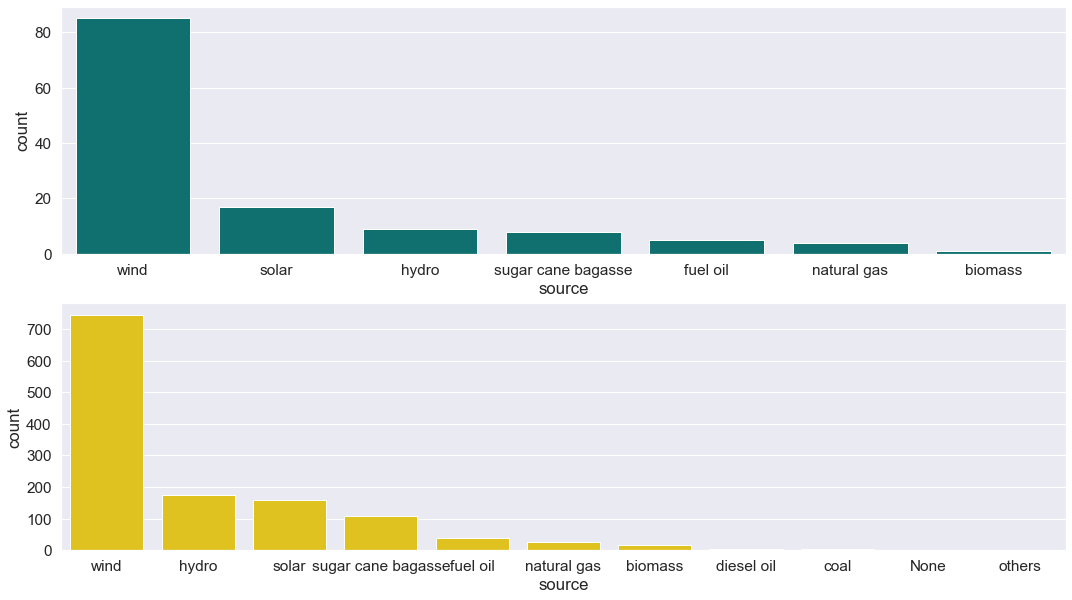

In [151]:
#Step 8: Make plots to compare
reversefactor = dict(zip(range(10),definitions))
df.source = np.vectorize(reversefactor.get)(df.source)
df.source
f, axes = plt.subplots(2, 1, figsize=(18, 10), sharex=False);
sns.countplot(x=df2["source"] , color="teal", order = df2['source'].value_counts().index, ax=axes[0]);
sns.countplot(x=df["source"] , color="gold", order = df['source'].value_counts().index, ax=axes[1]);

### An analysis of the metrics

#### Accuracy score

In [152]:
# The accuracy score substantially larger as when many parameters are tuned
accuracy_score(y_test, y_pred)


0.9069767441860465

#### The confusion matrix 

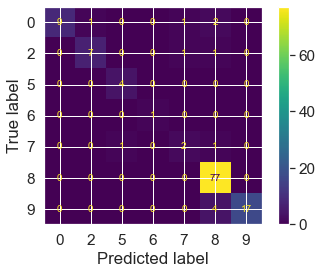

In [153]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
confusion_matrix(y_test,y_pred)
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

#### The statistics obtained from the confusion matrix for the multiclass problem are calculated as follows:
- Precision = TP/(TP+FP)
- Recall = TP(TP+FN)

<img width="50%" height="50%" align="left" src="confusionmatrix2.png"> 

In [154]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.69      0.82        13
           2       0.88      0.78      0.82         9
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00         1
           7       0.50      0.50      0.50         4
           8       0.91      1.00      0.95        77
           9       1.00      0.81      0.89        21

    accuracy                           0.91       129
   macro avg       0.87      0.83      0.84       129
weighted avg       0.91      0.91      0.90       129



In [ ]:
'hydro', 'coal', 'sugar cane bagasse', 'diesel oil', 'others',
       'fuel oil', 'biomass', 'natural gas', 'wind', 'solar', 'biogas'],

#### Log Loss 

In [157]:
from sklearn.metrics import log_loss

clf_probs = classifier.predict_proba(X_test)
cal_clf_probs = cal_clf.predict_proba(X_test)

score = log_loss(y_test, clf_probs, labels=['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
cal_score = log_loss(y_test, cal_clf_probs, labels=['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

print("Log-loss of")
print(f" * uncalibrated classifier: {score:.3f}")
print(f" * calibrated classifier: {cal_score:.3f}")

Log-loss of
 * uncalibrated classifier: 0.000
 * calibrated classifier: 0.000


According to this [resource](https://medium.com/@fzammito/whats-considered-a-good-log-loss-in-machine-learning-a529d400632d), a relatively high log-loss (significantly larger than 0) is acceptable for the case of a multiclass problem. In this case, the log loss score is very good.

#### Roc/Auc Score

In [158]:
roc_auc_score(y, cal_clf.predict_proba(X), multi_class='ovr')

0.5786695627078631

According to the available resources, an Roc/Auc score of 1 is the best score. The obtained score is average at best.

#### Key conclusions

##### The results are very satisfactory.  By using the "class_weight='balanced" option, the model opens up room for the unexpected, which is a problem that is faced by imbalanced datasets. In this case, the unexpected is that "solar" may appear more frequently than "hydro" in the predictions. The results are very accurate as well, as measured by the accuracy score and the high score of the category "wind". 